# Principal Component Analysis (PCA)

## Setup

In [21]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Fraud-Detection.git

import sys
sys.path.append('/content/Fraud-Detection.git/')
%cd /content/Fraud-Detection/
!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ GITHUB_PAT loaded successfully
Cloning into 'Fraud-Detection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 16.63 KiB | 16.63 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Fraud-Detection
/content/Fraud-Detection
Data  Fraud-Detection  LICENSE	README.md


In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
import pandas as pd
import joblib

file_path = '/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Variant II/X_scaled.pkl'

try:
    X_scaled = joblib.load(file_path)
    print("X_scaled loaded successfully!")
    print(X_scaled)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

X_scaled loaded successfully!
[[ 0.43445366 -1.46291765 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507  -1.33888985 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.08815514 -1.27531273 -0.36604267 ...  1.          0.
   0.        ]
 ...
 [ 0.43445366  0.80381346 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507   1.70294079 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.78075218  1.31241669 -0.36604267 ...  1.          0.
   0.        ]]


In [24]:
file_path_2 = '/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Variant II/X_scaled_full.pkl'

try:
    X_scaled_full = joblib.load(file_path_2)
    print("X_scaled with fraud_bool column loaded successfully!")
    print(X_scaled_full)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

X_scaled with fraud_bool column loaded successfully!
[[ 0.43445366 -1.46291765 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507  -1.33888985 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.08815514 -1.27531273 -0.36604267 ...  1.          0.
   0.        ]
 ...
 [ 0.43445366  0.80381346 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507   1.70294079 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.78075218  1.31241669 -0.36604267 ...  1.          0.
   0.        ]]


# Fit

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [26]:
X_pca_full = pca.fit_transform(X_scaled_full)

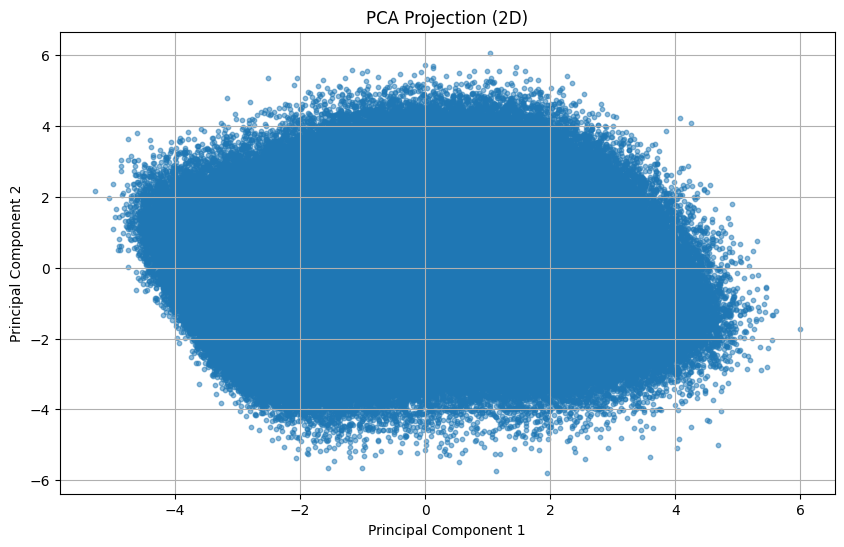

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.5)
plt.title('PCA Projection (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

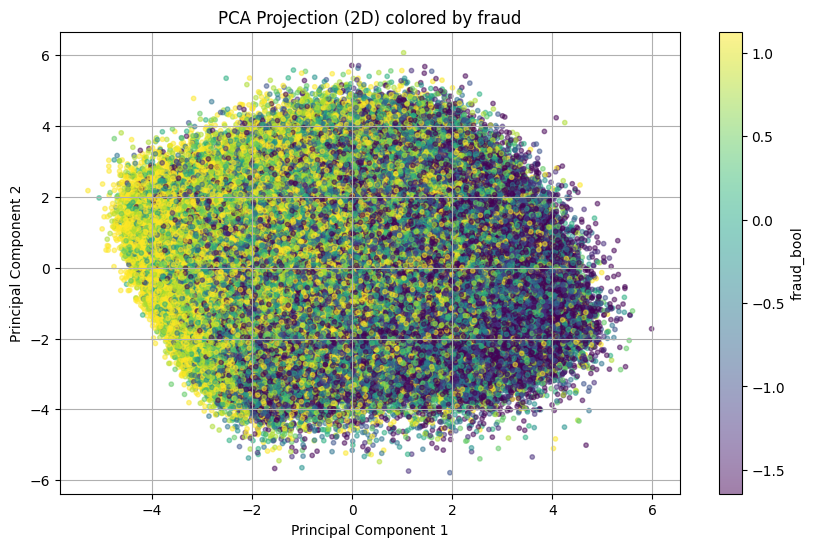

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=X_scaled_full[:, 0], s=10, alpha=0.5)
plt.title('PCA Projection (2D) colored by fraud')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='fraud_bool')
plt.grid(True)
plt.show()


# Explained Variance

In [29]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.10540659 0.07613438]
Total variance captured: 0.1815409729591764


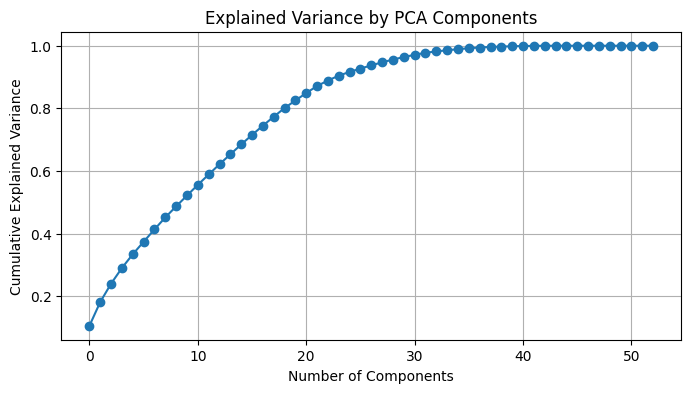

In [30]:
import numpy as np
pca_all = PCA().fit(X_scaled)
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [31]:
pca_full = PCA(n_components=0.95)
X_pca_full = pca_full.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {pca_full.n_components_}")

Number of components to retain 95% variance: 29


In [32]:
pca = PCA(n_components=29)
X_pca = pca.fit_transform(X_scaled)

In [35]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.10540659 0.07613438 0.05853395 0.05003846 0.04382289 0.03978822
 0.03950171 0.03833026 0.03532188 0.03459283 0.03413219 0.03302482
 0.03275194 0.03170811 0.03145788 0.03052001 0.02952809 0.02856939
 0.02766399 0.02420588 0.02380687 0.02244003 0.01754952 0.01555628
 0.01189633 0.01057873 0.0104751  0.0095913  0.00886797]
Total variance captured: 0.9557956072477828
